**QUESTION 1**</br>
Objective:</br>
This lab is designed to introduce students to basic data preprocessing techniques for unstructured data  specifically text, video, and audio. The objective is to clean, transform, and prepare each type of data to be suitable for downstream machine learning or deep learning tasks.</br>
Problem Statement:</br>
1. Text Data Preprocessing</br>
Text URL: https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt</br>
Tasks:</br>
•	Load the text file from the provided URL using Python libraries like requests or directly using file reading methods. Remove unwanted characters such as special symbols, digits, and extra spaces to clean the raw text.</br>
•	Split the cleaned text into individual words or tokens using a tokenizer (e.g., from the nltk or spaCy library).</br>
•	Remove commonly used words (called stop words) like "the", "is", "and", which usually carry less meaningful information.</br>
•	Apply stemming to reduce words to their root form (e.g., "running" becomes "run") using tools like PorterStemmer.</br>
•	Count and display the most frequent words remaining after preprocessing to gain insights into the content.</br>


In [ ]:
import requests
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import re
import nltk
nltk.download('stopwords')

In [ ]:
url = "https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt"

In [ ]:
response = requests.get(url)
raw_text = response.text

In [ ]:
cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', raw_text)
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

In [ ]:
tokens = cleaned_text.split()

In [ ]:
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words]

In [ ]:
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in tokens_no_stopwords]

In [ ]:
word_freq = Counter(stemmed_words)
most_common_words = word_freq.most_common(10)

most_common_words

[('said', 3464),
 ('one', 3448),
 ('may', 2551),
 ('pierr', 1964),
 ('would', 1953),
 ('princ', 1950),
 ('look', 1904),
 ('time', 1774),
 ('could', 1700),
 ('state', 1688)]

**QUESTION 2**</br>
2. Audio Data Preprocessing</br>
Audio URL: https://github.com/Jakobovski/free-spoken-digit-dataset/raw/master/recordings/0_george_0.wav</br>
Tasks:</br>
•	Load the audio file from the provided URL using an audio processing library such as librosa or scipy.</br>
•	Normalize the audio signal so that its amplitude lies within a consistent range (typically between -1 and 1) to improve processing stability.</br>
•	Visualize the audio waveform to understand the time-domain representation of the signal. You can use libraries like matplotlib for plotting.</br>
•	Extract MFCC (Mel Frequency Cepstral Coefficients) features from the audio. MFCCs are commonly used in audio and speech recognition tasks as they represent the short-term power spectrum of sound.</br>


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import requests
import soundfile as sf

In [ ]:
url = "https://github.com/Jakobovski/free-spoken-digit-dataset/raw/master/recordings/0_george_0.wav"
response = requests.get(url)

with open("audio.wav", "wb") as f:
    f.write(response.content)

audio, sr = librosa.load("audio.wav", sr=None)
print("Audio Shape:", audio.shape)
print("Sample Rate:", sr)

Audio Shape: (2384,)
Sample Rate: 8000


In [ ]:
audio = audio / np.max(np.abs(audio))

print("Max amplitude after normalization:", np.max(audio))
print("Min amplitude after normalization:", np.min(audio))

Max amplitude after normalization: 1.0
Min amplitude after normalization: -0.88516515


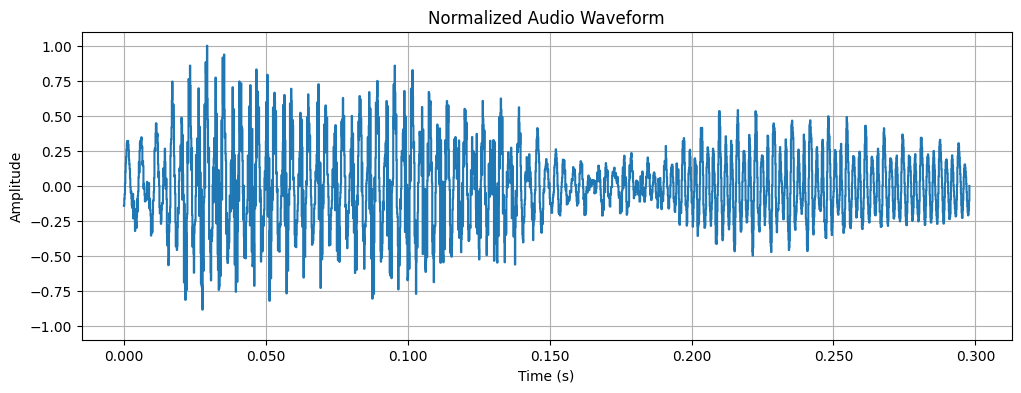

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Normalized Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [ ]:
# MFCC
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

print("MFCC shape:", mfccs.shape)

MFCC shape: (13, 5)


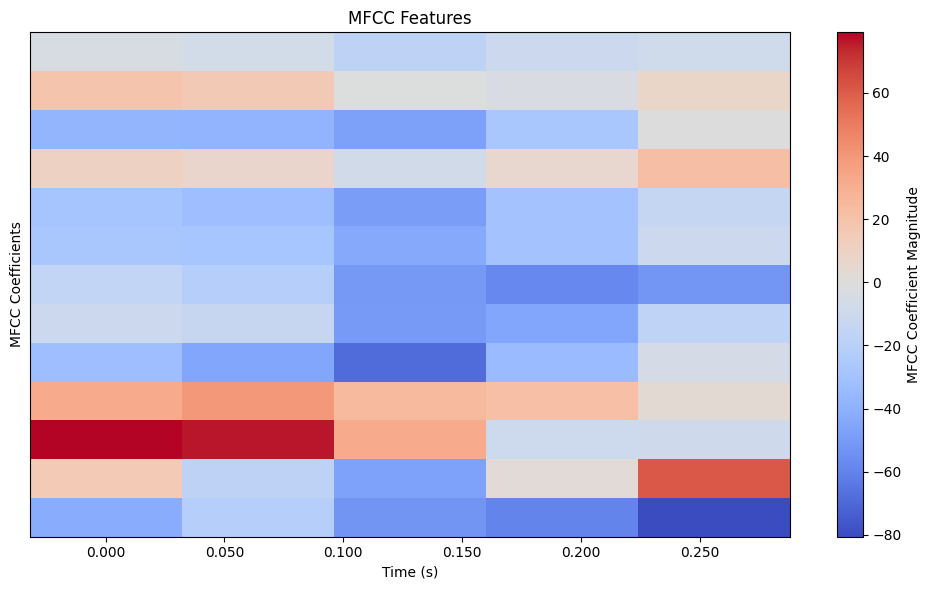

In [ ]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(label="MFCC Coefficient Magnitude")
plt.title("MFCC Features")
plt.ylabel("MFCC Coefficients")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

**QUESTION 3**
3. Video Data Preprocessing</br>
Video URL: https://avtshare01.rz.tu-ilmenau.de/avt-vqdb-uhd-1/test_1/segments/bigbuck_bunny_8bit_15000kbps_1080p_60.0fps_h264.mp4</br>

Tasks:</br>
•	Load the video from the given URL into your Python environment using a video processing library like OpenCV.</br>
•	Read the video frame by frame using a loop and store each frame for further processing.</br>
•	For every extracted frame, convert it from RGB (color) to grayscale using OpenCV functions.</br>
•	Resize each grayscale frame to a fixed size (e.g., 128×128 pixels) to maintain uniformity for analysis or model input.</br>

In [ ]:
import cv2
import numpy as np
import requests
from tqdm import tqdm

In [ ]:
video_url = "https://avtshare01.rz.tu-ilmenau.de/avt-vqdb-uhd-1/test_1/segments/bigbuck_bunny_8bit_15000kbps_1080p_60.0fps_h264.mp4"
video_filename = "video.mp4"

# Download video using requests
response = requests.get(video_url, stream=True)

with open(video_filename, 'wb') as f:
    for chunk in tqdm(response.iter_content(chunk_size=1024*1024), desc="Downloading Video"):
        if chunk:
            f.write(chunk)

In [ ]:
cap = cv2.VideoCapture(video_filename)

frames = []
resized_gray_frames = []

frame_count = 0
max_frames = 30

while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count >= max_frames:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    resized_frame = cv2.resize(gray_frame, (128, 128))

    resized_gray_frames.append(resized_frame)

    frame_count += 1

cap.release()
print(f"Processed {len(resized_gray_frames)} frames.")

Processed 30 frames.


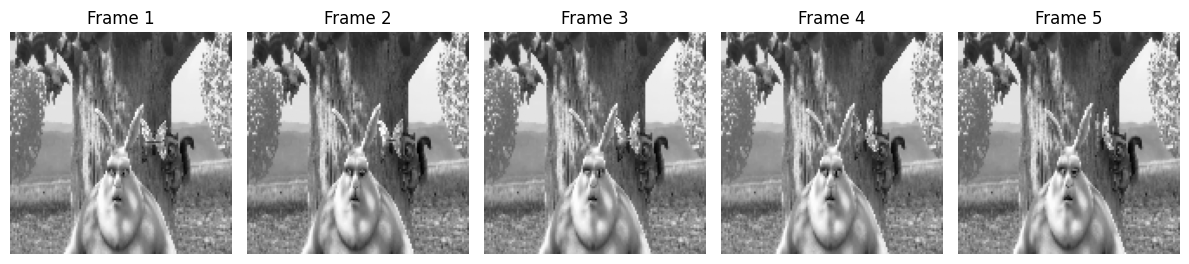

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(resized_gray_frames[i], cmap='gray')
    plt.title(f"Frame {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()